In [1]:
import numpy as np
import matplotlib.pyplot as plt

가장 높은 평균을 갖는 윈도우: 18-25h, 평균값 = 0.0385


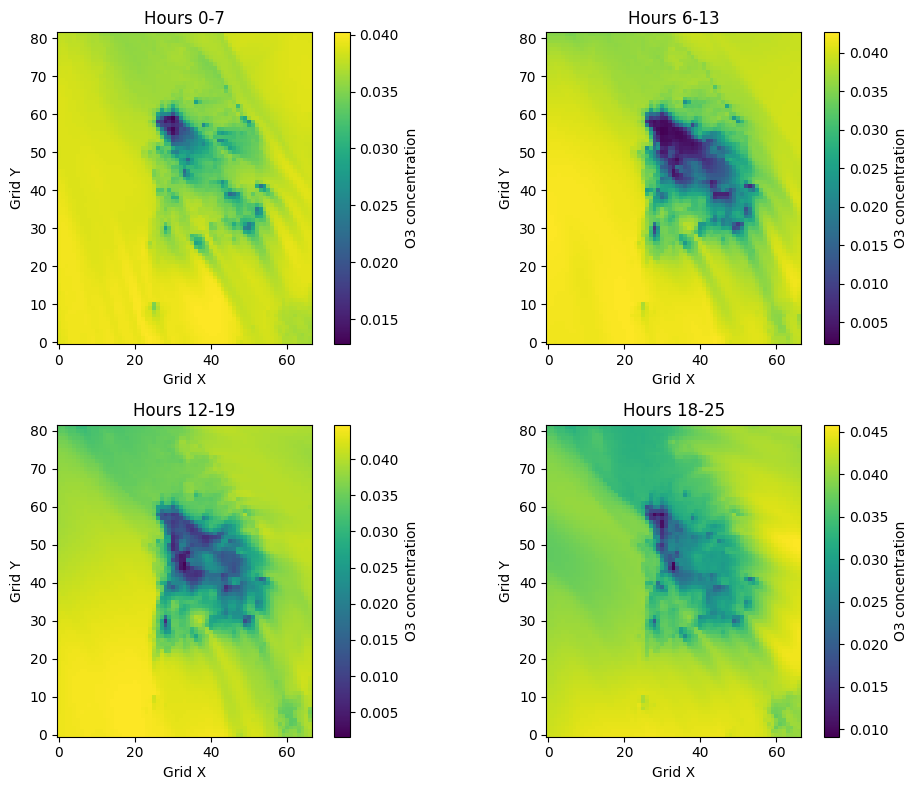

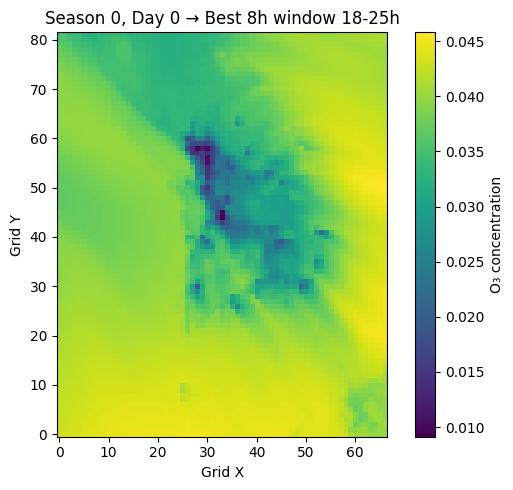

In [8]:
# 1) NPZ 파일 로드 (allow_pickle=True 필수)
npz_fp = '/home/user/workdir/CMAQ_Emulator/ncf_dataset/filtered/RSM_1.npz'  # 예시 경로
data = np.load(npz_fp, allow_pickle=True)
o3_map = data['o3_map']  # dtype=object, shape (4,)

# 2) 시각화할 인덱스 지정
season_idx = 0  # 0: 겨울, 1: 봄, 2: 여름, 3: 가을
day_idx = 0     # 해당 시즌의 첫 번째 일자

# 3) 시간블록 가져오기 (shape: (24, H, W))
daily_block = o3_map[season_idx][day_idx]

# 4) 8시간 윈도우 각 윈도우 평균맵 계산
starts = [0, 6, 12, 18]
avg_maps = [ daily_block[start:start+8].mean(axis=0) for start in starts ]

# 5) 각 윈도우 평균맵의 **전체 평균값** 계산
global_means = [ m.mean() for m in avg_maps ]          # 리스트 길이 4
best_idx     = int(np.argmax(global_means))            # 가장 큰 평균을 가진 인덱스
best_window  = starts[best_idx]                        # 시작 시간
best_map      = avg_maps[best_idx]                     # 선택된 지도

print(f"가장 높은 평균을 갖는 윈도우: {best_window}-{best_window+7}h, 평균값 = {global_means[best_idx]:.4f}")

# 6) 시각화
# 6.1) 각 윈도우 평균맵 시각화
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flat  # 1차원 이터러블로
for idx, ax in enumerate(axes):
    start = starts[idx]
    avg_map = avg_maps[idx]
    im = ax.imshow(avg_map, origin='lower')
    ax.set_title(f'Hours {start}-{start+7}')
    ax.set_xlabel('Grid X')
    ax.set_ylabel('Grid Y')
    fig.colorbar(im, ax=ax, label='O3 concentration')

plt.tight_layout()
plt.show()

# 6.2) 최대 윈도우 평균맵 시각화
plt.figure(figsize=(6,5))
im = plt.imshow(best_map, origin='lower')
plt.title(f'Season {season_idx}, Day {day_idx} → Best 8h window {best_window}-{best_window+7}h')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.colorbar(im, label='O₃ concentration')
plt.tight_layout()
plt.show()

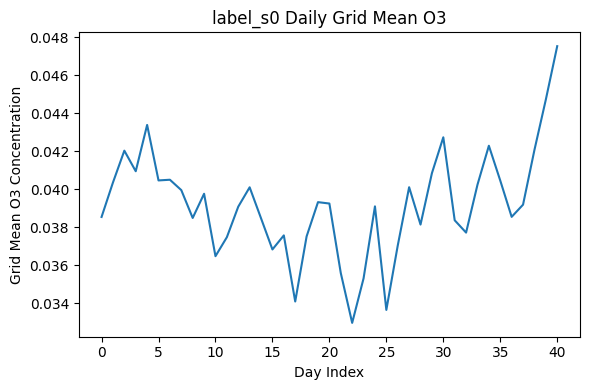

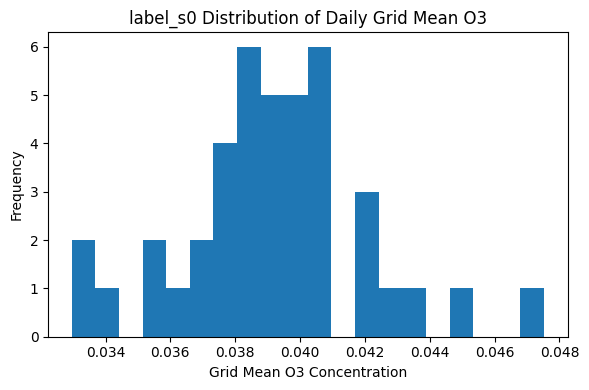

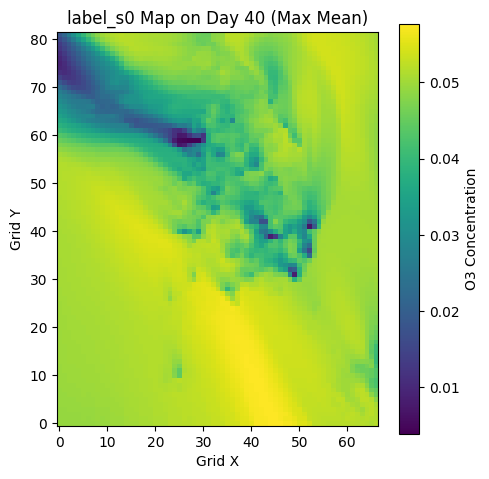

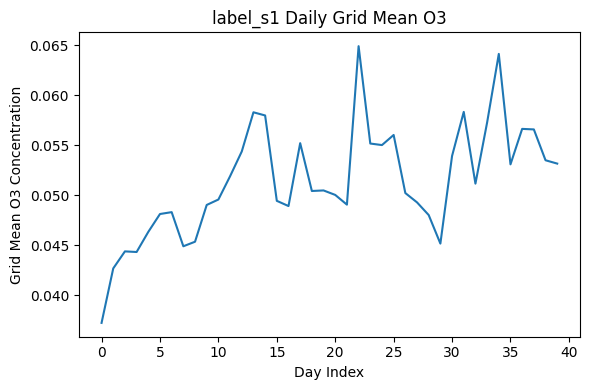

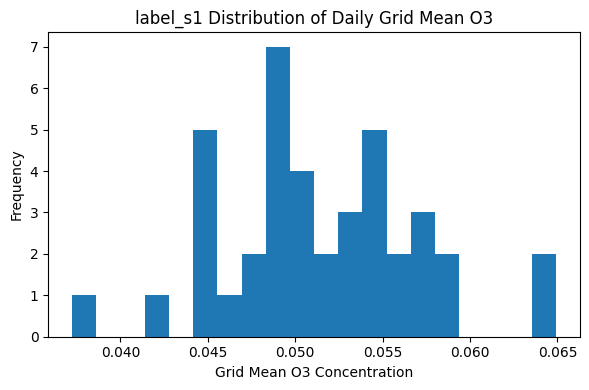

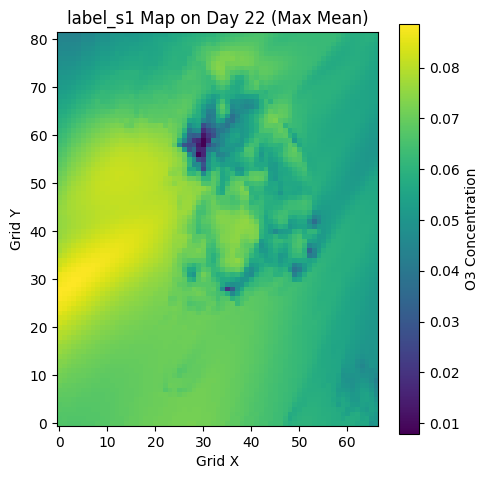

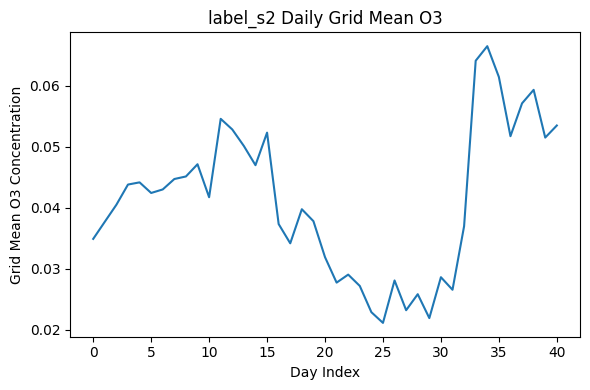

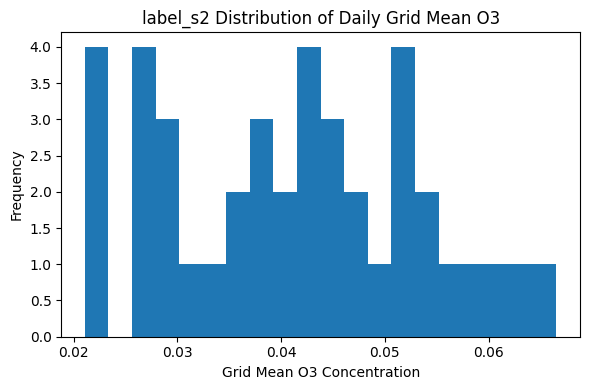

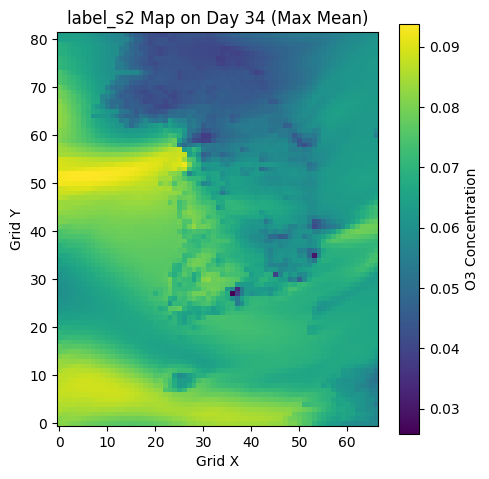

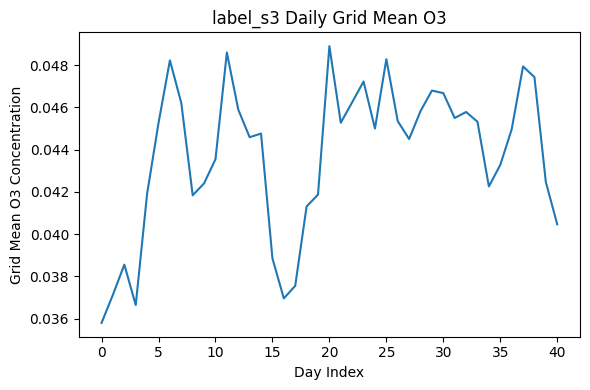

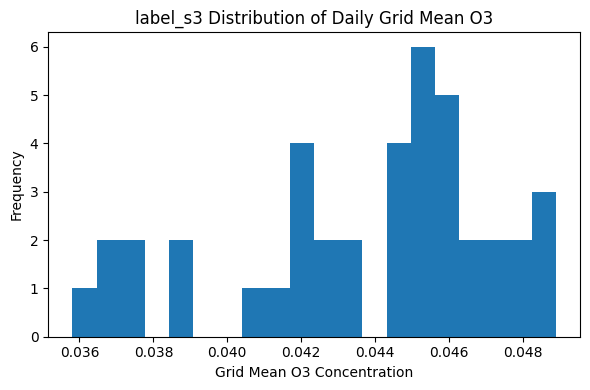

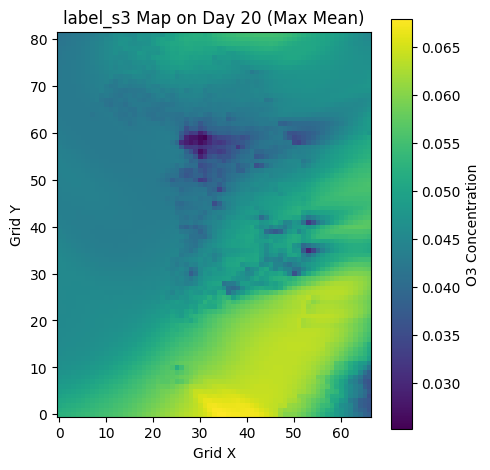

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Specify the NPZ file path to analyze
file_path = "/mnt/dsk1/mrlee/ncf_dataset/labels/RSM_1_label.npz"  # Update this path as needed

# 2) Load the data
data = np.load(file_path, allow_pickle=True)
season_keys = sorted([key for key in data.files if key.startswith("label_s")])

# 3) Statistical analysis and visualization for each season
for season_key in season_keys:
    arr = data[season_key]  # shape: (days, H, W)
    days, H, W = arr.shape
    
    # 3.1) Compute daily grid mean
    daily_means = arr.reshape(days, -1).mean(axis=1)
    
    # 3.2) Plot daily mean time series
    plt.figure(figsize=(6, 4))
    plt.plot(np.arange(days), daily_means)
    plt.title(f"{season_key} Daily Grid Mean O3")
    plt.xlabel("Day Index")
    plt.ylabel("Grid Mean O3 Concentration")
    plt.tight_layout()
    plt.show()
    
    # 3.3) Plot histogram of daily means
    plt.figure(figsize=(6, 4))
    plt.hist(daily_means, bins=20)
    plt.title(f"{season_key} Distribution of Daily Grid Mean O3")
    plt.xlabel("Grid Mean O3 Concentration")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    # 3.4) Visualize the map for the day with highest daily mean
    best_day = np.argmax(daily_means)
    best_map = arr[best_day]
    plt.figure(figsize=(5, 5))
    plt.imshow(best_map, origin='lower')
    plt.title(f"{season_key} Map on Day {best_day} (Max Mean)")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.colorbar(label="O3 Concentration")
    plt.tight_layout()
    plt.show()


In [13]:
import numpy as np

# 1) Specify the NPZ file path to inspect
file_path = "/mnt/dsk1/mrlee/ncf_dataset/labels/RSM_1_label.npz"  # Update this path as needed

# 2) Load the data with allow_pickle in case of object arrays
data = np.load(file_path, allow_pickle=True)

# 3) Print out available keys and their shapes
print(f"Loaded NPZ file: {file_path}\n")
for key in data.files:
    arr = data[key]
    print(f"Key: {key}\tShape: {arr.shape}\tDtype: {arr.dtype}")

# 4) Optional: summary statistics for each array
print("\nSummary statistics for each array:")
for key in data.files:
    arr = data[key]
    if arr.size > 0 and np.issubdtype(arr.dtype, np.number):
        flat = arr.ravel()
        print(f"{key}: min={flat.min():.4f}, max={flat.max():.4f}, mean={flat.mean():.4f}, std={flat.std():.4f}")
    else:
        print(f"{key}: non-numeric or empty array, skipping stats")

Loaded NPZ file: /mnt/dsk1/mrlee/ncf_dataset/labels/RSM_1_label.npz

Key: label_s0	Shape: (41, 82, 67)	Dtype: float32
Key: label_s1	Shape: (40, 82, 67)	Dtype: float32
Key: label_s2	Shape: (41, 82, 67)	Dtype: float32
Key: label_s3	Shape: (41, 82, 67)	Dtype: float32

Summary statistics for each array:
label_s0: min=0.0001, max=0.0577, mean=0.0392, std=0.0078
label_s1: min=0.0016, max=0.0897, mean=0.0515, std=0.0089
label_s2: min=0.0013, max=0.1099, mean=0.0411, std=0.0174
label_s3: min=0.0010, max=0.0730, mean=0.0437, std=0.0075
